## Analyzing CIA Factbook Data Using SQLite and Python

#### Author: Daivat Pandya

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
q = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(q, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
q = "SELECT name, MIN(population) FROM facts;"
pd.read_sql_query(q, conn)

,name,MIN(population)
0,Antarctica,0


In [5]:
q = "SELECT name, MAX(population) FROM facts;"
pd.read_sql_query(q, conn)

,name,MAX(population)
0,World,7256490011


We can observe here that the database contains a row where Antarctica is country and a row where the aggregate values of the whole world is posted.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

q = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE name NOT IN ('Antarctica', 'World');"
df = pd.read_sql_query(q, conn)
df

,population,population_growth,birth_rate,death_rate
0,32564342.0,2.32,38.57,13.89
1,3029278.0,0.30,12.92,6.58
2,39542166.0,1.84,23.67,4.31
3,85580.0,0.12,8.13,6.96
4,19625353.0,2.78,38.78,11.49
5,92436.0,1.24,15.85,5.69
6,43431886.0,0.93,16.64,7.33
7,3056382.0,0.15,13.61,9.34
8,22751014.0,1.07,12.15,7.14
9,8665550.0,0.55,9.41,9.42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17f8f81c50>,
      dtype=object)

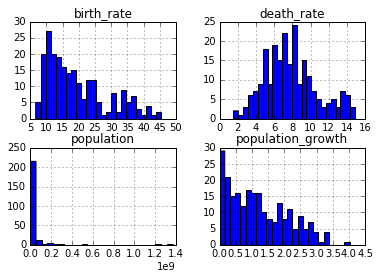

In [7]:
df.hist(bins = 25)

In [8]:
q = "SELECT name, CAST(population AS Float) / CAST(area_land AS Float) pop_density FROM facts ORDER BY pop_density DESC;"
df = pd.read_sql_query(q, conn)
df

,name,pop_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


This is the list of countries ranked by population density. Our results compare very similar to those from Wikipedia.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17ef0116d8>]],
      dtype=object)

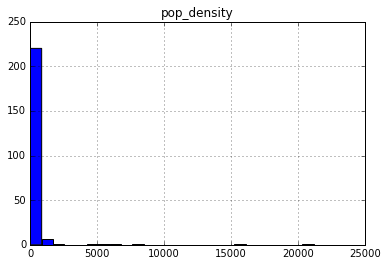

In [9]:
df.hist(bins = 25)

In [10]:
q = "SELECT name, CAST(area_water AS Float) / CAST(area_land AS Float) water_to_land FROM facts ORDER BY water_to_land DESC;"
df = pd.read_sql_query(q, conn)
df

,name,water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


As we can see, some of the countries with the highest ratio of water to land are British Indian Ocean Territory, Virgin Islands, Puerto Rico, The Bahamas. Out of which British Indian Ocean Territory and Virgin Islands have more water than land.